In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

In [2]:
# Загружаем данные из файла, присвоив названия заголовкам таблицы, заменив символ "?" на NaN
DataLabels = ['Surgery', 'Age', 'Hospital number','Rectal_temperature', 'Puls','Respiratory_rate', 'Temperature_extremities', 'Peripheral pulse', 'Mucous membranes', 'Capillary refill time', 'Pain', 'Perestalsis', 'Abdominal distension', 'Nasogastric tube', 'Nasogastric reflux', 'Nasogastric reflux PH', 'Rectal examination', 'Abdomen', 'Packed cell volume', 'Total protein', 'Abdominocentesis appearance', 'Abdomcentesis total protein', 'Outcome', 'Surgical lesion', '25', '26', '27', 'Cp_data']
fail = pd.read_csv('horse_data.csv', names = DataLabels, sep = ',', header=None, na_values=["?"])
fail.head()

,Surgery,Age,Hospital number,Rectal_temperature,Puls,Respiratory_rate,Temperature_extremities,Peripheral pulse,Mucous membranes,Capillary refill time,...,Packed cell volume,Total protein,Abdominocentesis appearance,Abdomcentesis total protein,Outcome,Surgical lesion,25,26,27,Cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [3]:
fail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Surgery                      299 non-null    float64
 1   Age                          300 non-null    int64  
 2   Hospital number              300 non-null    int64  
 3   Rectal_temperature           240 non-null    float64
 4   Puls                         276 non-null    float64
 5   Respiratory_rate             242 non-null    float64
 6   Temperature_extremities      244 non-null    float64
 7   Peripheral pulse             231 non-null    float64
 8   Mucous membranes             253 non-null    float64
 9   Capillary refill time        268 non-null    float64
 10  Pain                         245 non-null    float64
 11  Perestalsis                  256 non-null    float64
 12  Abdominal distension         244 non-null    float64
 13  Nasogastric tube    

In [4]:
# Преобразуем строковые данные в числовые
df = fail.apply(lambda column: pd.to_numeric(column), axis=0)
df.head()

,Surgery,Age,Hospital number,Rectal_temperature,Puls,Respiratory_rate,Temperature_extremities,Peripheral pulse,Mucous membranes,Capillary refill time,...,Packed cell volume,Total protein,Abdominocentesis appearance,Abdomcentesis total protein,Outcome,Surgical lesion,25,26,27,Cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [5]:
# Расчитаем долю пропусков для всех столбцов
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')   

Surgery - 0.3%
Age - 0.0%
Hospital number - 0.0%
Rectal_temperature - 20.0%
Puls - 8.0%
Respiratory_rate - 19.3%
Temperature_extremities - 18.7%
Peripheral pulse - 23.0%
Mucous membranes - 15.7%
Capillary refill time - 10.7%
Pain - 18.3%
Perestalsis - 14.7%
Abdominal distension - 18.7%
Nasogastric tube - 34.7%
Nasogastric reflux - 35.3%
Nasogastric reflux PH - 82.3%
Rectal examination - 34.0%
Abdomen - 39.3%
Packed cell volume - 9.7%
Total protein - 11.0%
Abdominocentesis appearance - 55.0%
Abdomcentesis total protein - 66.0%
Outcome - 0.3%
Surgical lesion - 0.0%
25 - 0.0%
26 - 0.0%
27 - 0.0%
Cp_data - 0.0%


In [6]:
# Рассчитаем корреляционную матрицу для количественных переменных

# Две самые скоррелированные переменные: Respiratory rate, Puls
df_sample = df.loc[:, ['Rectal_temperature', 'Puls', 'Respiratory_rate', 'Packed cell volume', 'Total protein', 'Abdomcentesis total protein']].head()
df_sample.corr()

,Rectal_temperature,Puls,Respiratory_rate,Packed cell volume,Total protein,Abdomcentesis total protein
Rectal_temperature,1.000000,0.255711,0.267962,-0.583071,0.527883,-1.0
Puls,0.255711,1.000000,0.886045,0.414669,-0.053303,1.0
Respiratory_rate,0.267962,0.886045,1.000000,0.079159,-0.391047,1.0
Packed cell volume,-0.583071,0.414669,0.079159,1.000000,0.003518,-1.0
Total protein,0.527883,-0.053303,-0.391047,0.003518,1.000000,-1.0
Abdomcentesis total protein,-1.000000,1.000000,1.000000,-1.000000,-1.000000,1.0


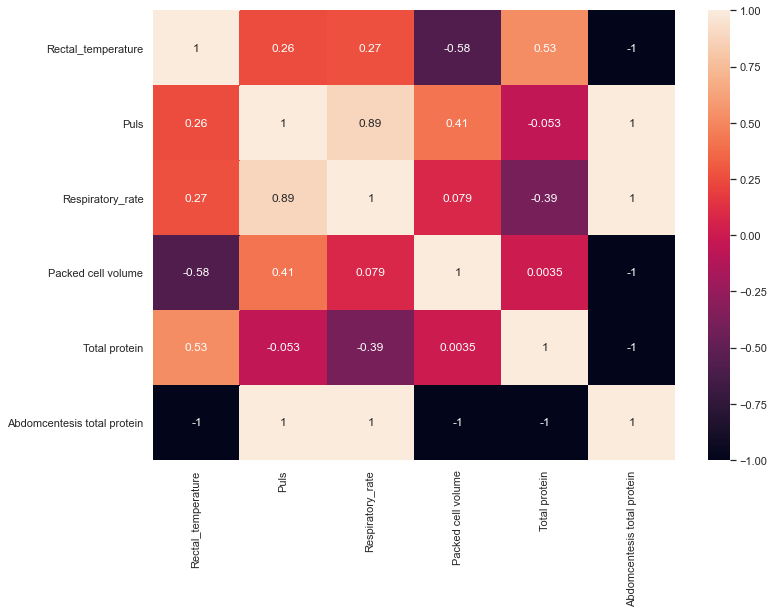

In [7]:
# Визуализируем корреляционную матрицу
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_sample.corr(), annot=True)

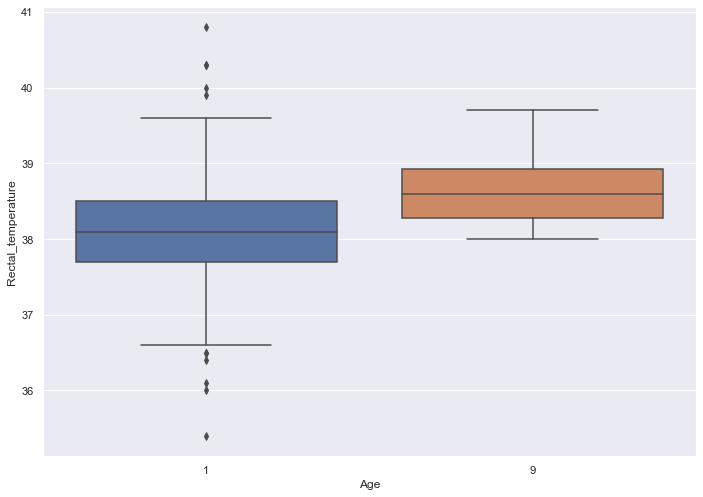

In [8]:
# Построим распределение Ректальный температуры по возрасту лошадей
rectal_temperature = df.Age.value_counts().sort_values(ascending = False).head(3).index.values
sns.boxplot(x="Age", y="Rectal_temperature", 
            data=df[df.Age.isin(rectal_temperature)])

In [9]:
# Удалим выбросы через межквартльный размах
q1 = df.Rectal_temperature.quantile(0.25)
q3 = df.Rectal_temperature.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df.Rectal_temperature.between(lower_bound, upper_bound, inclusive=True)].sort_values('Rectal_temperature')

In [10]:
# Рассчитаем основные статистики Ректальный температуры для каждой категории возраста лошадей (Age)
df_sample = remove_outliers.loc[:, ['Rectal_temperature','Age']].groupby('Age')
df_sample.describe()

Rectal_temperature                                                     
                 count       mean       std   min    25%   50%    75%   max
Age                                                                        
1                207.0  38.130435  0.568332  36.8  37.80  38.1  38.50  39.5
9                 19.0  38.589474  0.434479  38.0  38.25  38.6  38.85  39.5

In [11]:
print(f'Значение медианы для Ректальный температуры: {df_sample.Rectal_temperature.median()}')

Значение медианы для Ректальный температуры: Age
1    38.1
9    38.6
Name: Rectal_temperature, dtype: float64


In [12]:
# Проведем замену пропусков Rectal_temperature медианой
remove_outliers[['Rectal_temperature']][remove_outliers['Age'] == 1].fillna(remove_outliers[['Rectal_temperature']][remove_outliers['Age'] == 1].median(), inplace=True)
remove_outliers[['Rectal_temperature']][remove_outliers['Age'] == 9].fillna(remove_outliers[['Rectal_temperature']][remove_outliers['Age'] == 9].median(), inplace=True)

In [13]:
df = remove_outliers

In [14]:
df.shape

(226, 28)

In [15]:
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

Surgery - 0.4%
Age - 0.0%
Hospital number - 0.0%
Rectal_temperature - 0.0%
Puls - 2.7%
Respiratory_rate - 11.9%
Temperature_extremities - 18.1%
Peripheral pulse - 21.2%
Mucous membranes - 15.0%
Capillary refill time - 8.8%
Pain - 17.3%
Perestalsis - 12.8%
Abdominal distension - 16.4%
Nasogastric tube - 33.6%
Nasogastric reflux - 35.0%
Nasogastric reflux PH - 79.6%
Rectal examination - 30.5%
Abdomen - 40.7%
Packed cell volume - 8.0%
Total protein - 9.3%
Abdominocentesis appearance - 53.1%
Abdomcentesis total protein - 64.6%
Outcome - 0.4%
Surgical lesion - 0.0%
25 - 0.0%
26 - 0.0%
27 - 0.0%
Cp_data - 0.0%


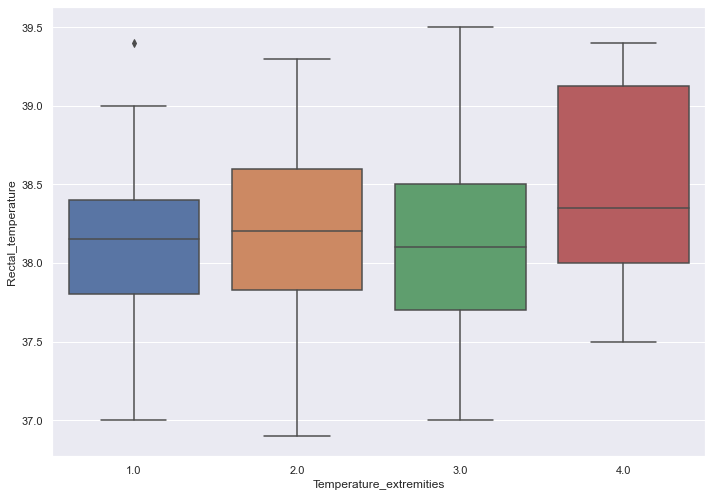

In [16]:
# Построим распределение Ректальный температуры по категории "Temperature_extremities"

"""
Визуализировав распределение, принимаю решение игнорировать пропуски в столбце Temperature_extremities. 
Медианы всех четырех категорий равны. Из описательной части к данным Dataseta 3, 4 категории должны 
обладать меньшей температурой.
"""
rectal_temperature = df.Temperature_extremities.value_counts().sort_values(ascending = False).head(4).index.values
sns.boxplot(x="Temperature_extremities", y="Rectal_temperature", 
            data=df[df.Temperature_extremities.isin(rectal_temperature)])

In [17]:
# Построим модель логистической регрессии

# Загружаем данные в датафрейм
data = df.loc[:, ['Peripheral pulse', 'Abdominal distension', 'Perestalsis', 'Mucous membranes', 'Cp_data']]
data = data.dropna()
data_outcome = data.Cp_data

In [18]:
# Разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_outcome, test_size=0.2)

In [19]:
# Импортируем функционал
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()

In [21]:
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
lr.predict(X_test)

array([1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 1], dtype=int64)

In [23]:
# Расчет точности - отношение верный прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, lr.predict(X_test))

1.0

In [25]:
lr.coef_

array([[ 0.17744332, -0.07524656, -0.14839967, -0.08363292,  4.73818641]])

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
# Вычислим матрицу неточностей, чтобы оценить точность классификации
confusion_matrix(y_test, lr.predict(X_test))

array([[16,  0],
       [ 0, 15]], dtype=int64)